In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [3]:
def plot_boxplot(data_for, data_parallel_for, data_openmp, title):
    fig, ax = plt.subplots(figsize=[10, 8])

    boxs = []
    ticks = []
    colors = []

    # Primo box: versione sequenziale
    boxs.append(data_for)
    ticks.append("for")
    colors.append("orange")

    # Aggiungi coppie (parallel_for, openmp) per ogni numero di thread
    for i in range(len(data_parallel_for)):
        boxs.append(data_parallel_for[i])
        boxs.append(data_openmp[i])
        # Etichette duplicate, ma le rendiamo visivamente chiare
        ticks.append(f"{n_threads[i]}")  
        ticks.append(f"{n_threads[i]}")  
        colors.extend(["skyblue", "lightgreen"])

    # Crea il boxplot
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    # Applica colori ai box
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Etichette e titolo
    ax.set_xlabel('Threads')
    ax.set_ylabel('Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks, rotation=30)
    ax.set_yscale('log')

    # Legenda
    legend_handles = [
        Patch(facecolor='orange', label='for (sequential)'),
        Patch(facecolor='skyblue', label='parallel_for'),
        Patch(facecolor='lightgreen', label='OpenMP')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Calcolo e stampa delle mediane ---
    medians = [np.median(d) for d in boxs]
    print("\n=== BOX PLOT MEDIANS ===")
    print(f"{'Label':<15} | {'Median (µs)':>12}")
    print("-" * 30)

    print(f"{'for':<15} | {medians[0]:>12.2f}")
    idx = 1
    for i in range(len(data_parallel_for)):
        print(f"parallel_for (th={n_threads[i]}): {medians[idx]:>10.2f} µs")
        print(f"OpenMP       (th={n_threads[i]}): {medians[idx+1]:>10.2f} µs")
        idx += 2
    print("=" * 30 + "\n")

In [4]:
def plot_speedup(dati_parallel,dati_openmp,title,threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    parallel_median = [np.median(datum) for datum in dati_parallel]
    speedup_parallel = np.zeros(len(threads))

    openmp_median = [np.median(datum) for datum in dati_openmp]
    speedup_openmp = np.zeros(len(threads))


    for i in range(len(threads)):
        speedup_parallel[i] = parallel_median[0]/parallel_median[i+1]
        speedup_openmp[i] = openmp_median[0]/openmp_median[i+1]

    ax.plot(threads,speedup_parallel,'o--')
    ax.plot(threads,speedup_openmp,'x--')

    ax.legend(['speedup_threadpool','speedup_OpenMP'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(threads)
    ax.set_xticklabels(threads, rotation = 45)
    ax.set_yscale('log', base = 2)
    ax.set_xscale('log', base = 2)

    ax.set(xlabel = 'Threads',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa speedup ---
    print("\n=== SPEEDUP VALUES ===")
    for i, t in enumerate(threads):
        print(f"{t} threads -> threadpool: {speedup_parallel[i]:.2f} | OpenMP: {speedup_openmp[i]:.2f}")
    print("=======================\n")

## prestazioni parallel_for al variare di granularity

In [6]:
#set parameter
n_runs = 50
n_size = 8000 #costo singola iterazione
n_threads = [1,2,4,8,16,32,64,96]
size_queue = 1024
granularity = -1

In [5]:
# for
dati_for = [651476 ,652572 ,729809 ,680296 ,697405 ,713381 ,650301 ,706643 ,673684 ,727727 ,650992 ,716115 ,650016 ,653768 ,728053 ,651748 ,724431 ,652149 ,664053 ,704490]

# parallel_for
dati_parallel = []
dati_parallel_thread1 = [672122 ,673425 ,753391 ,755262 ,741027 ,667615 ,675592 ,750309 ,735786 ,687067 ,739572 ,667543 ,669392 ,750081 ,667900 ,737031 ,688384 ,682705 ,728258 ,667253]
dati_parallel_thread2 = [339540 ,665465 ,334730 ,334850 ,334518 ,335632 ,335688 ,334618 ,334958 ,334660 ,335104 ,336031 ,333659 ,337079 ,336425 ,336027 ,335073 ,335996 ,335108 ,337785 ]
dati_parallel_thread4 = [171098 ,166927 ,166982 ,166191 ,166773 ,166045 ,225934 ,168776 ,339705 ,168869 ,188002 ,205051 ,167466 ,167165 ,167232 ,167541 ,299452 ,222596 ,167829 ,167321]
dati_parallel_thread8 = [168230 ,84996 ,85060 ,85402 ,85319 ,85568 ,85309 ,85371 ,87287 ,85980 ,174214 ,184946 ,170754 ,88153 ,166368 ,86564 ,86042 ,84954 ,132544 ,137476 ]
dati_parallel_thread16 = [133454 ,74295 ,74101 ,85155 ,73659 ,82962 ,83223 ,41904 ,83953 ,42469 ,42596 ,42305 ,42410 ,42169 ,42120 ,50247 ,52824 ,42013 ,42735 ,43061]
dati_parallel_thread32 = [47769 ,42352 ,41897 ,37290 ,66182 ,37609 ,37236 ,37655 ,37388 ,43526 ,37387 ,37944 ,41887 ,37570 ,42224 ,57781 ,37540 ,37403 ,37769 ,37355]
dati_parallel_thread64 = [52368 ,44869 ,47175 ,53310 ,38245 ,37033 ,34794 ,20572 ,21071 ,21126 ,21227 ,20507 ,21387 ,34379 ,20291 ,22120 ,20633 ,20929 ,20409 ,20464]
dati_parallel_thread96 = [118465 ,23955 ,30752 ,25022 ,24744 ,23346 ,23427 ,23276 ,13671 ,24923 ,23030 ,22745 ,23249 ,23502 ,23069 ,23019 ,23012 ,44501 ,24618 ,23080]

n_threads = [1, 2, 4, 8, 16, 32, 64, 96]

for i in n_threads:
    dq = locals()[f"dati_parallel_thread{i}"]
    dati_parallel.append(dq)

# openmp
dati_openMp = []
dati_openMp_thread1 = [688867 ,681945 ,682783 ,681723 ,686282 ,759478 ,682390 ,684196 ,762971 ,682279 ,682496 ,751964 ,681877 ,683171 ,684285 ,682189 ,683608 ,682194 ,681305 ,682916]
dati_openMp_thread2 = [352641 ,346443 ,346908 ,345415 ,346107 ,346143 ,345559 ,345702 ,345545 ,345802 ,345368 ,345598 ,345494 ,345381 ,345373 ,345159 ,345379 ,344655 ,345374 ,345232]
dati_openMp_thread4 = [181756 ,172961 ,173018 ,173952 ,173281 ,183261 ,211882 ,173371 ,172324 ,172178 ,173220 ,208460 ,194871 ,173267 ,172035 ,172638 ,176701 ,277442 ,205119 ,171780]
dati_openMp_thread8 = [90741 ,85872 ,85580 ,85761 ,85698 ,86058 ,86152 ,87298 ,85684 ,86165 ,86076 ,155973 ,108863 ,87113 ,85994 ,85697 ,85818 ,85675 ,85835 ,85467]
dati_openMp_thread16 = [60680 ,58357 ,58622 ,58298 ,58411 ,58319 ,58465 ,58391 ,58448 ,58261 ,58578 ,58327 ,58296 ,58286 ,58515 ,58270 ,94461 ,58975 ,58085 ,58698]
dati_openMp_thread32 = [28943 ,23488 ,22937 ,23223 ,23146 ,23141 ,23255 ,23164 ,23235 ,23375 ,23329 ,23505 ,23463 ,23324 ,35498 ,26923 ,23424 ,23378 ,24658 ,23508]
dati_openMp_thread64 = [23725 ,20221 ,20224 ,20146 ,22954 ,20291 ,20494 ,20422 ,20927 ,24705 ,20605 ,20661 ,20645 ,20635 ,20667 ,20673 ,20658 ,20703 ,20843 ,26850]
dati_openMp_thread96 = [54924 ,31773 ,26200 ,31877 ,27663 ,14509 ,14831 ,14884 ,16281 ,14558 ,14846 ,14821 ,14822 ,14821 ,14826 ,14825 ,14807 ,14831 ,14812 ,14902]

for i in n_threads:
    dq = locals()[f"dati_openMp_thread{i}"]
    dati_openMp.append(dq)



=== BOX PLOT MEDIANS ===
Label           |  Median (µs)
------------------------------
for             |    676990.00
parallel_for (th=1):  687725.50 µs
OpenMP       (th=1):  682849.50 µs
parallel_for (th=2):  335370.00 µs
OpenMP       (th=2):  345519.50 µs
parallel_for (th=4):  167685.00 µs
OpenMP       (th=4):  173326.00 µs
parallel_for (th=8):   86303.00 µs
OpenMP       (th=8):   85933.00 µs
parallel_for (th=16):   46654.00 µs
OpenMP       (th=16):   58401.00 µs
parallel_for (th=32):   37712.00 µs
OpenMP       (th=32):   23376.50 µs
parallel_for (th=64):   21307.00 µs
OpenMP       (th=64):   20659.50 µs
parallel_for (th=96):   23386.50 µs
OpenMP       (th=96):   14831.00 µs


=== SPEEDUP VALUES ===
1 threads -> threadpool: 0.98 | OpenMP: 0.99
2 threads -> threadpool: 2.02 | OpenMP: 1.96
4 threads -> threadpool: 4.04 | OpenMP: 3.91
8 threads -> threadpool: 7.84 | OpenMP: 7.88
16 threads -> threadpool: 14.51 | OpenMP: 11.59
32 threads -> threadpool: 17.95 | OpenMP: 28.96
64 threads -

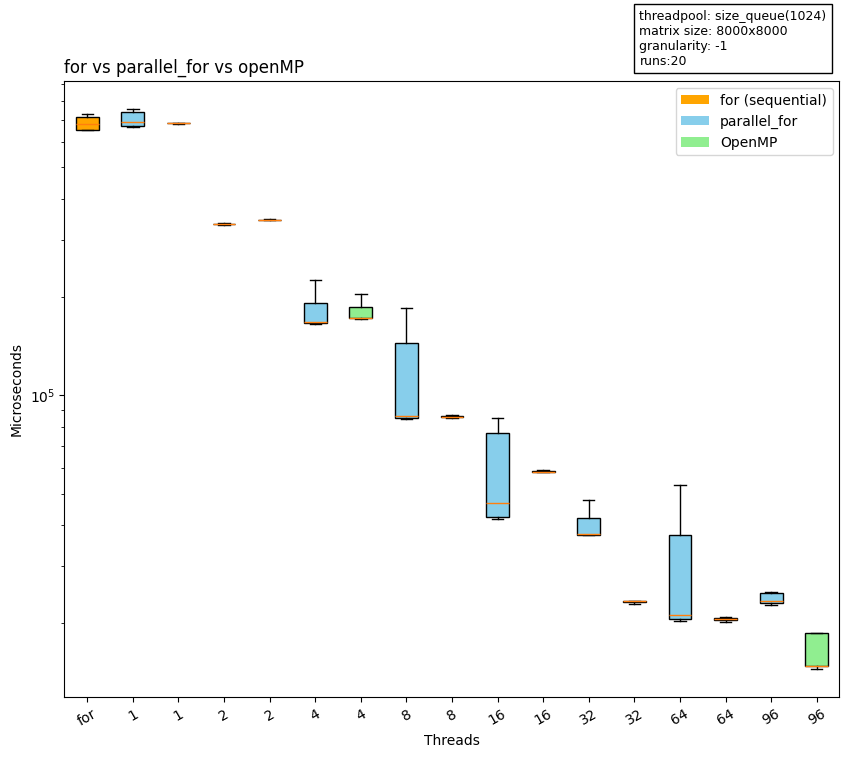

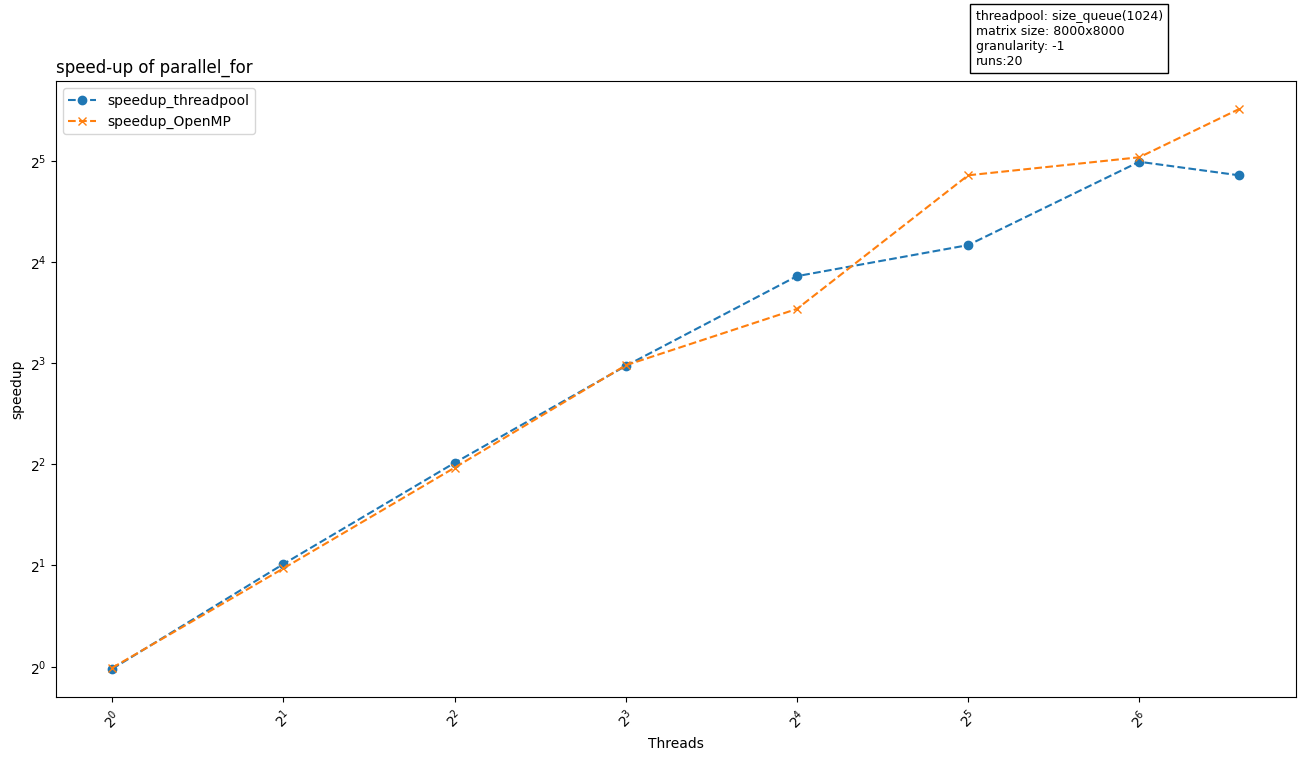

In [7]:
plot_boxplot(dati_for, dati_parallel,dati_openMp,"for vs parallel_for vs openMP")
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_openMp[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)


=== SPEEDUP VALUES ===
1 threads -> threadpool: 0.98 | OpenMP: 0.99
2 threads -> threadpool: 2.02 | OpenMP: 1.96
4 threads -> threadpool: 4.04 | OpenMP: 3.91
8 threads -> threadpool: 7.84 | OpenMP: 7.88
16 threads -> threadpool: 14.51 | OpenMP: 11.59
32 threads -> threadpool: 17.95 | OpenMP: 28.96
64 threads -> threadpool: 31.77 | OpenMP: 32.77
96 threads -> threadpool: 28.95 | OpenMP: 45.65



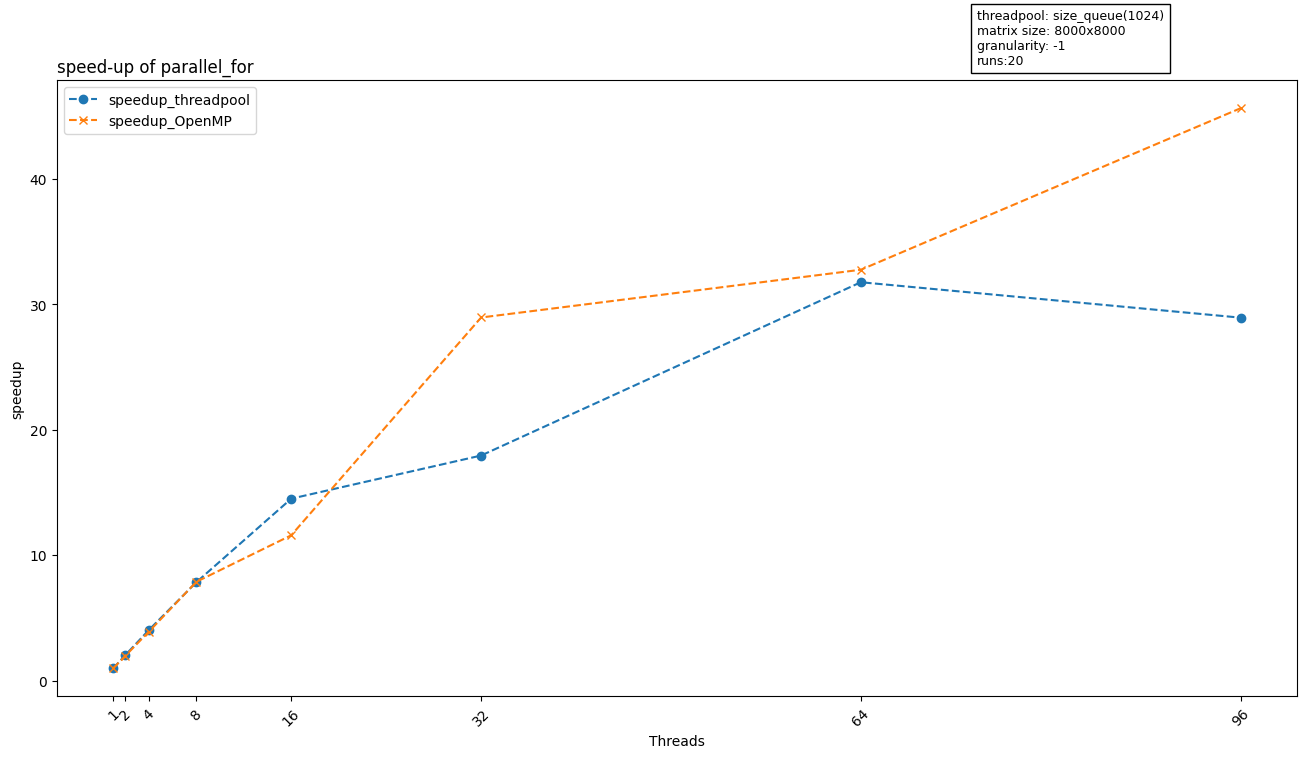

In [7]:
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_openMp[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)